<a href="https://colab.research.google.com/github/habsaa/ProjectData/blob/main/ProjectRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

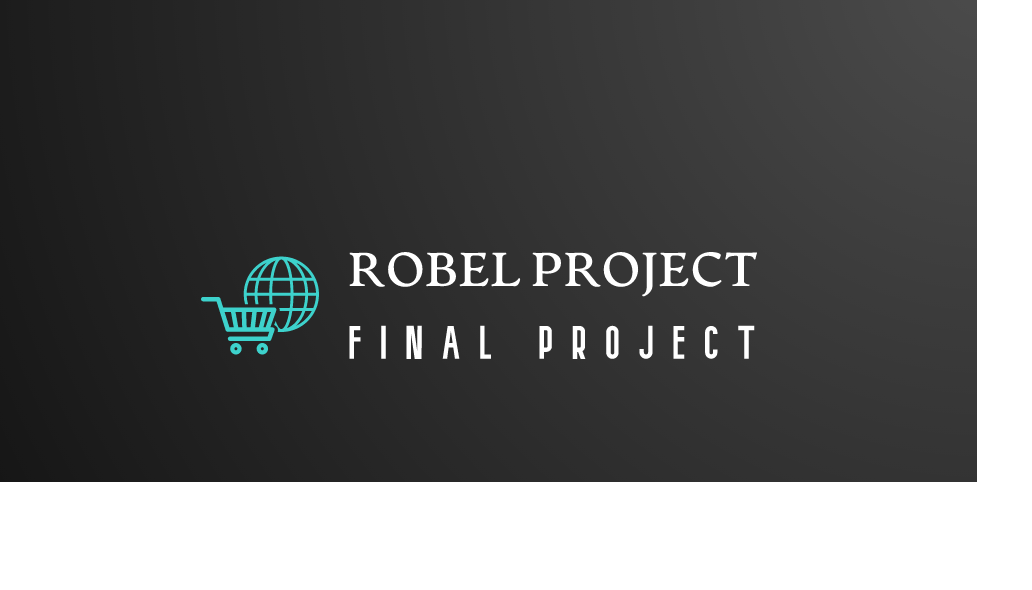

In [20]:
!pip install hvplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import hvplot.pandas


In [21]:
MyData = pd.read_csv('https://raw.githubusercontent.com/habsaa/ProjectData/main/MyDataCleaned.csv', index_col=0)
pd.plotting.register_matplotlib_converters()
MyData.index = pd.to_datetime(MyData.index)
MyData = MyData.reindex(MyData.max(axis=1).sort_values().index)  # sort the data according to the maximum value of each row, smallest first
print(MyData.head())
print(MyData.describe())


                               Order ID  ... Count
1970-01-01 00:00:00.000067547    141234  ...     1
1970-01-01 00:00:00.000067548    141235  ...     1
1970-01-01 00:00:00.000067549    141236  ...     1
1970-01-01 00:00:00.000067550    141237  ...     1
1970-01-01 00:00:00.000067551    141238  ...     1

[5 rows x 12 columns]
            Order ID  Quantity Ordered  ...         Minute     Count
count  185950.000000     185950.000000  ...  185950.000000  185950.0
mean   230417.569379          1.124383  ...      29.481361       1.0
std     51512.737110          0.442793  ...      17.317573       0.0
min    141234.000000          1.000000  ...       0.000000       1.0
25%    185831.250000          1.000000  ...      14.000000       1.0
50%    230367.500000          1.000000  ...      29.000000       1.0
75%    275035.750000          1.000000  ...      45.000000       1.0
max    319670.000000          9.000000  ...      59.000000       1.0

[8 rows x 8 columns]


In [22]:
#shape of the dataset
MyData.shape


(185950, 12)

The dataset has in total 185,950 rows and 12 columns

In [23]:
#coumns details within the dataset
MyData.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'City', 'Sales', 'Hour', 'Minute',
       'Count'],
      dtype='object')

In [24]:
# Concise summary of the dataset
MyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185950 entries, 1970-01-01 00:00:00.000067547 to 1970-01-01 00:00:00.000055510
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   City              185950 non-null  object 
 8   Sales             185950 non-null  float64
 9   Hour              185950 non-null  int64  
 10  Minute            185950 non-null  int64  
 11  Count             185950 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 18.4+ MB


In [25]:
# checking missing vales
MyData.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
City                0
Sales               0
Hour                0
Minute              0
Count               0
dtype: int64

From above it can be seen that there are no missing valuaes in all the colmns of the dataset as this dataset hasb been cleaned and pprepared before loading it for final analysis.

# ***Data Exploration***

General exploration of line plot for all quantity order within the 12 month.

In [70]:
plot = MyData.hvplot.line(
    frame_height=900, frame_width=900,
    xlabel='Month', ylabel='Quantity Ordered',
    title='Overall quantity ordered'
)
hvplot.show(plot)

Launching server at http://localhost:42739


***Question 1: Oveall sales trend over time of the online sales dataset?***

In [26]:
MyData['Order Date'].min()

'01/01/2019 03:07'

In [27]:
MyData['Order Date'].max()

'12/31/19 23:53'

From the above findigs it can be seen that the dataset we have is from '01/01/2019' to '12/31/2019/ that is a speread of 12 months of a year.

In [62]:
#getting month year from the dataset
MyData['month_year'] = pd.to_datetime(MyData['Order Date']).dt.strftime('%Y-%m')

In [64]:
# grouping month_year by sales
MyData_trend = MyData.groupby('month_year').sum()['Sales'].reset_index()


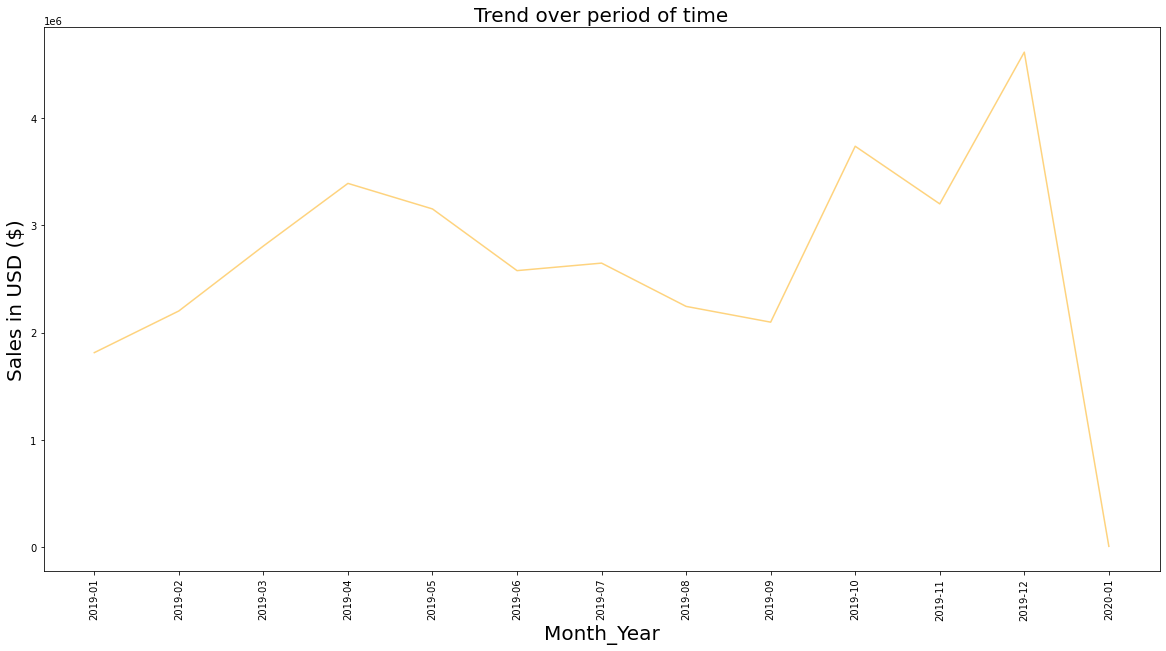

In [94]:
plt.figure(figsize=(20,10))   # Setting the figure size
plt.plot(MyData_trend['month_year'], MyData_trend['Sales'], color= '#fed37e')
plt.xticks(rotation='vertical', size=10)

plt.ylabel('Sales in USD ($)', fontsize=20)
plt.xlabel('Month_Year', fontsize=20)
plt.title('Trend over period of time', fontsize=20)
plt.show()


From the above trend line plot it can be clearly observed that the sales have been steady increasing from 1st month till the 4th month.The first peak sale was in **April** month, may be bcause of easter holidays. Then there was high high peaks in **October and December**. May be due to holidays as wel, especially during December due to christmas holidays. 

***Question 2: Investigate the best month for sales and how much it was?***

In [31]:
MyData['Sales'] = MyData['Quantity Ordered'].astype('int') * MyData['Price Each'].astype('float')

In [49]:
MyData = MyData.reindex(MyData.max(axis=1).sort_values().index)
MyData.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06,139485,282440,9709
2,1871052592,13449,2.188885e+06,2.202022e+06,172669,354885,11975
3,2564810956,17005,2.791208e+06,2.807100e+06,218969,447559,15153
4,3387347100,20558,3.367671e+06,3.390670e+06,262259,544186,18279
5,3345871523,18667,3.135125e+06,3.152607e+06,238780,487899,16566
6,2932976072,15253,2.562026e+06,2.577802e+06,195528,402436,13554
7,3284139576,16072,2.632540e+06,2.647776e+06,206169,417349,14293
8,2899373917,13448,2.230345e+06,2.244468e+06,172289,353857,11961
9,2948726831,13109,2.084992e+06,2.097560e+06,168513,341698,11621


range(1, 13)


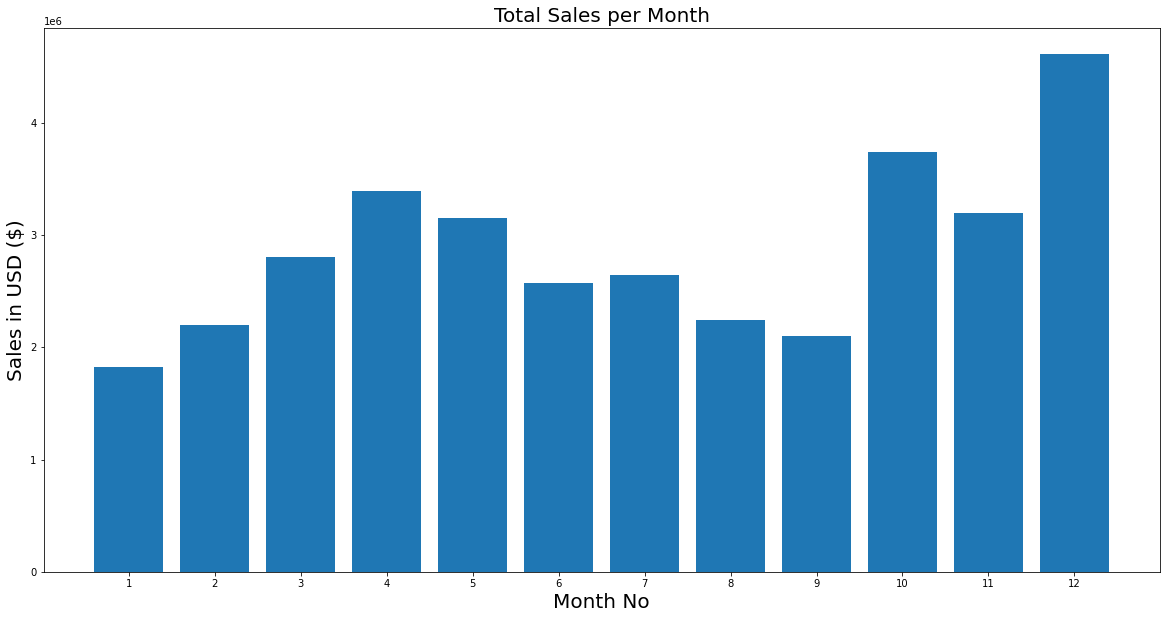

In [96]:
plt.figure(figsize=(20, 10))

months = range(1,13)
print(months)



plt.bar(months,MyData.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)', fontsize=20)
plt.xlabel('Month No', fontsize=20)
plt.title('Total Sales per Month', fontsize=20)
plt.show()

From the graph it can be seen that December(12th month) had the most sell followed by October. December had  sale of about $4.6 million and followed by October of 3.7 million in sales.

***Question 3: Investigate the total sales for each city and city with the most sales?***

In [34]:
MyData.groupby(['City']).sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,,
Atlanta (GA),3423838407,16602,2.779908e+06,104794,2.795499e+06,214264,442932,14881
Austin (TX),2280982185,11153,1.809874e+06,69829,1.819582e+06,141946,289060,9905
Boston (MA),4598265261,22528,3.637410e+06,141112,3.661642e+06,288225,590442,19934
Dallas (TX),3415643578,16730,2.752628e+06,104620,2.767975e+06,214390,435155,14820
Los Angeles (CA),6811084693,33289,5.421435e+06,208325,5.452571e+06,427444,866638,29605
New York City (NY),5736333884,27932,4.635371e+06,175741,4.664317e+06,357696,733598,24876
Portland (ME),563266345,2750,4.471893e+05,17144,4.497583e+05,35211,72856,2455
Portland (OR),2305594747,11303,1.860558e+06,70621,1.870732e+06,144421,295533,10010
San Francisco (CA),10304443952,50239,8.211462e+06,315520,8.262204e+06,643265,1319477,44732


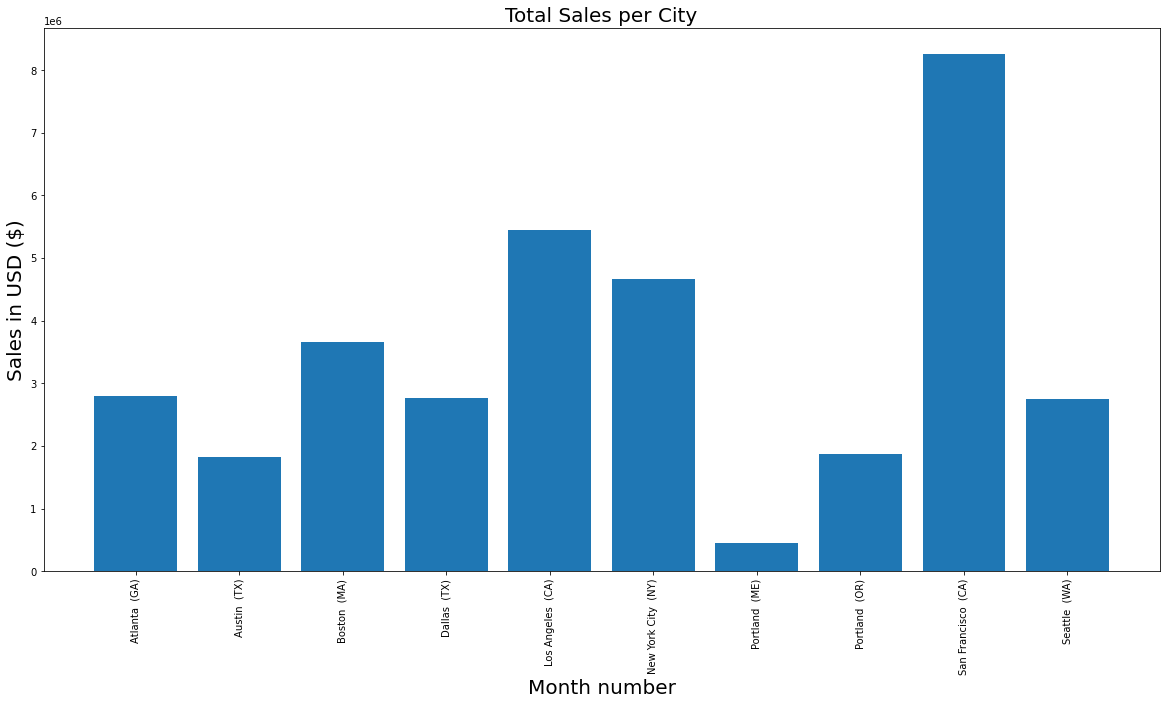

In [35]:
plt.figure(figsize=(20, 10))
keys = [city for city, MyData in MyData.groupby(['City'])]

plt.bar(keys,MyData.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)', fontsize=20)
plt.xlabel('Month number', fontsize=20)
plt.title('Total Sales per City', fontsize=20)
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

From the above analysis and graphs it can be seen that **San Francisco** had the most sales with about **$8.2 million** . The second most sales was by the city of Los Angeles.

***Question 4: Investigate the most sold product and the reason it sold the most? And also the top five most sold products by ranking ?***

In [85]:
product_group = MyData.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
# Sorting the dataframe in descending order
quantity_ordered.sort_values(ascending=False)



Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

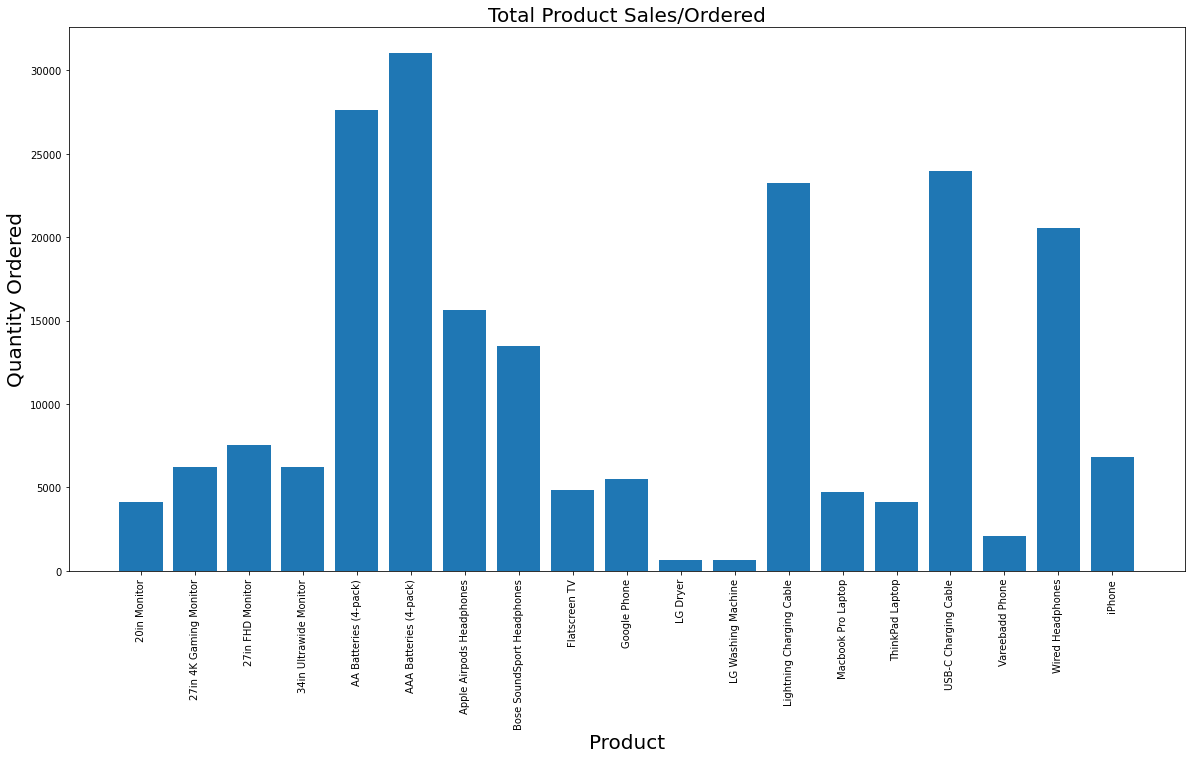

In [86]:
product_group = MyData.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


plt.figure(figsize=(20, 10))
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)

plt.ylabel('Quantity Ordered', fontsize=20)
plt.xlabel('Product', fontsize=20)
plt.title('Total Product Sales/Ordered', fontsize=20)

plt.xticks(keys, rotation='vertical', size=10)
plt.show()

From the above graph and analysis it can be seen that **AAA Batteries (4-pack)** with about 31017 orders is the most ordered product. The reason could be because if its low price and the demand for it due to its use in most electronics products.
The top 5 most order prodcts are **('AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'USB-C Charging Cable', 'Lightning Charging Cable' and 'Wired Headphones'.**

***Question 4.1 Does price have effect on the quantity ordered?*** Further analysis into the above question and graph, by doing correlation analysis. To see if price has effect on the quantity ordered.

<Figure size 1440x720 with 0 Axes>

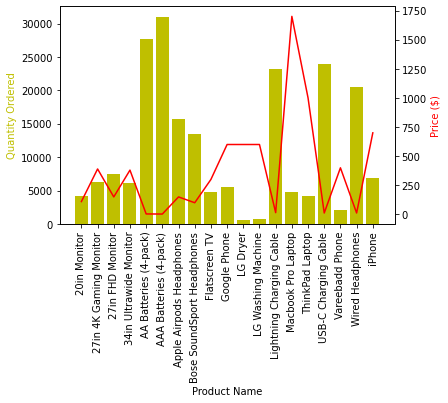

In [105]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib 

prices = MyData.groupby('Product').mean()['Price Each']

plt.figure(figsize=(20, 10))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='y')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='y')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=10)

fig.show()

from the above it can be seen that there is a correlation between price and quantity ordered. When the price is low the quantity ordered is high. therefore that could be the reason the low priced items are sold the most. But there is inconsistent with the macbook pro, which doesnt correlate even if the price is high the quantity ordered is also high. This could be due to high demand of students tending to buy Macbook Pro Laptop despite the price.

***Question 5: Investigate and recommend the time advertisement should be displayed for maximazation of customer's buying product?***

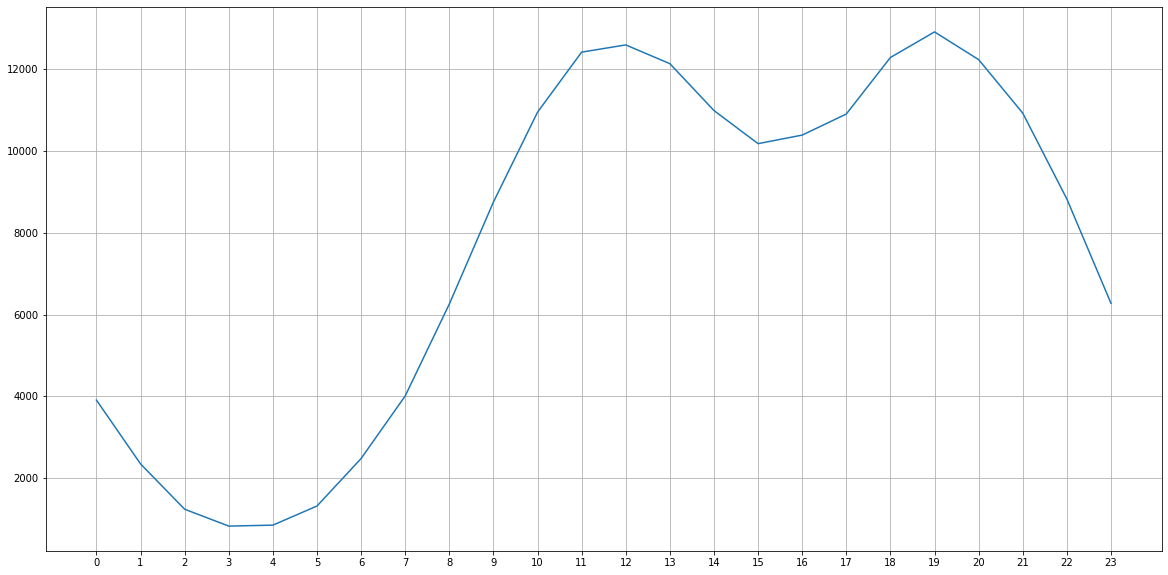

In [114]:
keys = [pair for pair, df in MyData.groupby(['Hour'])]


plt.figure(figsize=(20, 10))

plt.plot(keys, MyData.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()



My recommendation for the time advertisement should be displayed for maximazation of customer's buying product is slightly before 11am-12pm or arond 7pm.

***Question 6: Investigate and find out which products are mostly sold together?***

In [42]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = MyData[MyData['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(15):
    print(key, value)

('Google Phone', 'USB-C Charging Cable') 656
('iPhone', 'Lightning Charging Cable') 611
('Lightning Charging Cable', 'iPhone') 404
('USB-C Charging Cable', 'Google Phone') 343
('iPhone', 'Wired Headphones') 289
('Google Phone', 'Wired Headphones') 256
('Vareebadd Phone', 'USB-C Charging Cable') 239
('iPhone', 'Apple Airpods Headphones') 235
('Wired Headphones', 'iPhone') 173
('Wired Headphones', 'Google Phone') 167
('Apple Airpods Headphones', 'iPhone') 138
('Google Phone', 'Bose SoundSport Headphones') 134
('USB-C Charging Cable', 'Vareebadd Phone') 129
('USB-C Charging Cable', 'Wired Headphones') 111
('Wired Headphones', 'USB-C Charging Cable') 94


From the above analysis it can be see that the products most sold together is **('Google Phone', 'USB-C Charging Cable') with 656** times. Followed by ('iPhone', 'Lightning Charging Cable') 611.

***below is line plot of variance***

In [44]:

plot = MyData.hvplot.line(
    frame_height=200, frame_width=600,
    xlabel='Month', ylabel='Quantity Ordered',
    title='Varient Total quantity ordered',
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset'],
    subplots=True
).cols(1)
hvplot.show(plot)

Launching server at http://localhost:45505


***Question 7: Total sales for each product and which 3 products had the most sales revenue?***

In [48]:
Sales = MyData.groupby('Product').mean()['Sales']
print(sales)

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Sales, dtype: float64


In [ ]:
product_group = MyData.groupby('Product')
sales = product_group.sum()['Sales']


plt.figure(figsize=(20, 10))
keys = [pair for pair, df in product_group]
plt.bar(keys, sales)

plt.ylabel('Sales', fontsize=20)
plt.xlabel('Product', fontsize=20)
plt.title('Total Product Sales', fontsize=20)

plt.xticks(keys, rotation='vertical', size=10)
plt.show()

Above bar chart shows the sales revenue for each product of Walmart's online sales proucts. Macbook Pro Laptop has the most sales revenue of about $8 million, this could be because of its high price, quantity ordered and also its high demand from customers. The top 3 products with the highest sales revenue are **'Macbook Pro Laptop', 'iPhone' and 'Google Phone'** in consective order.

***The end of the Data Exploration***